# 지리 정보 데이터 처리

[데이터 사이언스 스쿨 - 지리 정보 데이터 처리](https://datascienceschool.net/view-notebook/ef921dc25e01437b9b5c532ba3b89b02/)

<br>

GIS(Geospatial Information System)

- 지리정보데이터

# 1. GeoPandas

- 파이썬에서 지리정보 데이터 처리의 기하학적 연산과 시각화 등을 돕는 패키지
- 자료형
  - `GeoSeries`
  - `GeoDataFrame`

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
gpd.__version__

'0.4.1'

In [2]:
# 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

path = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothicCoding


**샘플 데이터 로드**

In [3]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,49052489.0,Africa,South Africa,ZAF,491000.0,POLYGON ((31.52100141777888 -29.25738697684626...
175,11862740.0,Africa,Zambia,ZMB,17500.0,"POLYGON ((32.75937544122132 -9.23059905358906,..."
176,12619600.0,Africa,Zimbabwe,ZWE,9323.0,"POLYGON ((31.19140913262129 -22.2515096981724,..."


In [4]:
cities.tail()

,name,geometry
197,Cairo,POINT (31.24802236112612 30.05190620510371)
198,Tokyo,POINT (139.7494615705447 35.68696276437117)
199,Paris,POINT (2.33138946713035 48.86863878981461)
200,Santiago,POINT (-70.66898671317483 -33.4480679569341)
201,Singapore,POINT (103.853874819099 1.294979325105942)


<br>

## 1.1 지리 정보의 시각화

- `GeoSeries`와 `GeoDataFrame` 객체의 `plot()` 명령을 사용하면, Geometry 데이터를 시각화할 수 있다.
- Geometry 데이터
  - 지리정보를 표현하는 다각형, 선, 점을 의미
- GeoPandas는 내부적으로 다각형, 선, 점을 **Sharpely** 패키지를 사용하여 처리한다.
  - 각 Polygon(다각형), LineString(선), Point(점)로 정의되어 있음

- 대부분의 경우 지리정보를 시각화할 때는 위치에 따른 정보의 변화를 함께 표현
- 이 때는 `plot()` 명령의 `column` 인자에 반영하고 싶은 데이터의 열 이름을 입력  
$\rightarrow$ 해당 열의 데이터를 **색(color)**으로 표현
- 표현하려는 정보가 카테고리 데이터 일때는 `categorical` 인자를 `True`로 설정

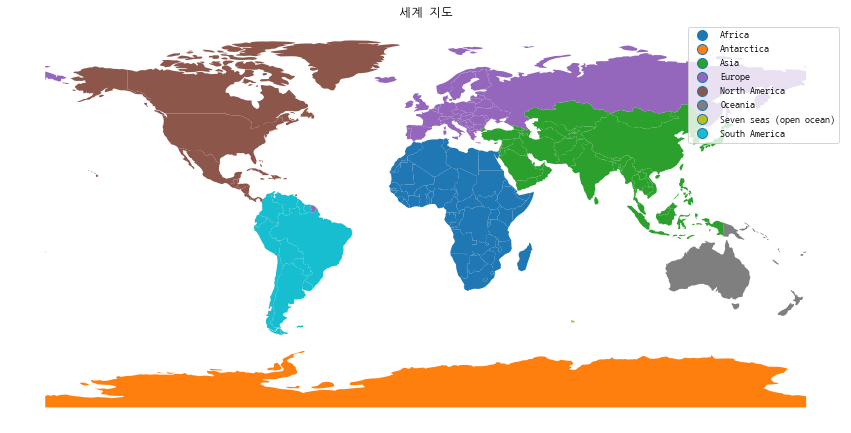

In [5]:
ax = countries.plot(figsize=(15,15), column="continent", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

- 표현하고 싶은 컬럼이 실수 변수  
$\rightarrow$ 색을 변화시키는 기준, 즉 **데이터를 구분하는 방법**과 **갯수**를 정의할 수 있다.

구분하는 방법

- `plot()` 명령의 `scheme` 인자로 설정
- 값의 종류
  - `Equal_interval` : 동일한 간격으로 구분
  - `Quantiles` : 4분위수를 구하여 구분
  - `Fisher_Jenks` : 클래스 내 분산을 줄이고, 클래스 끼리의 분산을 최대화하는 방식으로 구분

구분하는 갯수

- `k` 인자에 원하는 숫자를 입력 (default = 5)

<br>

(예제) 국가별 GDP 추정치를 해당 국가의 추정인구로 나누어, 추정 1인당 GDP 산출 후 지도에 색으로 표현

- 정보를 색으로 나타낼 때는 표현하려는 정보에 따라, 컬러맵을 설정하는 것이 좋다.
- 이 예와 같이 수치적인 정보를 시각화할 때는, 수치만큼 색이 밝고 어두워지는 것으로 표현하는 것이 적절  
$\rightarrow$ Sequence 계열의 컬러맵을 설정하는 것이 좋다.
- [컬러맵 참고 링크](https://matplotlib.org/tutorials/colors/colormaps.html)

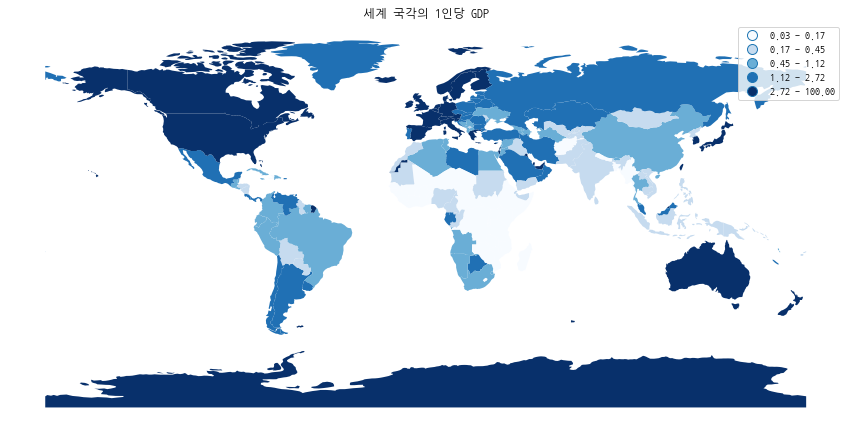

In [6]:
# 1인당 GDP 연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(figsize=(15,15),
                    column='gdp_per_cap',
                    legend=True,
                    scheme='quantiles',
                    cmap='Blues',
                    k=5)
ax.set_axis_off()
ax.set_title("세계 국각의 1인당 GDP")
plt.show()

<br>

## 1.2 Geometry 데이터

- GeoPandas에서는 Shapely라는 패키지를 통해 Geometry 데이터를 처리한다.
- Geometry 데이터의 종류
  - Polygons
  - Points
  - LineString

<br>

### 1.2.1 Polygons

- 한 국가의 영토 따위 등은 여러 개의 점을 이은 다각형으로 나타낼 수 있다.

In [7]:
countries.geom_type[:3]

0         Polygon
1    MultiPolygon
2         Polygon
dtype: object

In [8]:
# 여러 개의 점(Point)들로 이루어져 있다.
print(countries.geometry[113])

POLYGON ((165.7799898623264 -21.08000497811563, 166.5999914899338 -21.70001881275353, 167.1200114280869 -22.15999073658349, 166.7400346214448 -22.39997608814695, 166.1897322939687 -22.12970834726045, 165.4743754417522 -21.67960662199823, 164.8298153017757 -21.14981983814195, 164.1679952334136 -20.44474659595163, 164.029605747736 -20.10564584725235, 164.4599670758627 -20.1200118954295, 165.0200362490421 -20.45999114347773, 165.4600093935751 -20.80002206795826, 165.7799898623264 -21.08000497811563))


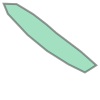

In [9]:
countries.geometry[113]

<br>

### 1.2.2 Points

- 어떤 사건이 발생한 위치, 한 국가의 수도, 두 국가간의 중앙점 등은 하나의 좌표로 나타낼 수 있다.
- `cities` 데이터에서는 도시를 하나의 점으로 나타냄
- 이 점을 다음처럼 지도 위에 표현할 수 있다.

In [10]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

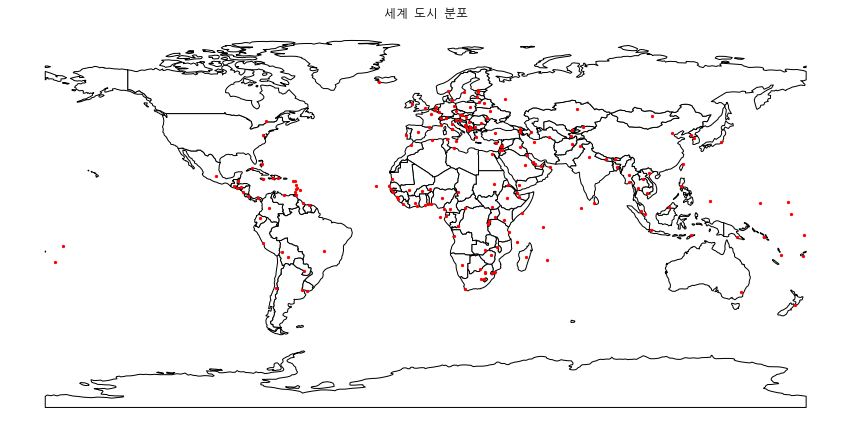

In [11]:
base = countries.plot(figsize=(15,15), color='white', edgecolor='k')
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

<br>

### 1.2.3 LineString

- 점과 점을 이은 것은 선이 된다.
- 두 도시 사이의 길, 강의 흐름, 국격의 생김새, 경계면 정보 등을 선으로 나타낼 수 있다.  
  
  
- 다음 코드는 우리나라의 육지를 선으로 나타낸 것이다.
- 여기서 사용되는 `squeeze()` 함수는 GeoPandas 객체에서 Geometry 데이터만을 추출해주는 기능을 한다.

In [12]:
korea_border = countries[countries.name == "South Korea"].geometry
korea_border

GeoSeries([], Name: geometry, dtype: object)

In [13]:
countries[countries.name.str.contains('Korea')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
87,48508972.0,Asia,Korea,KOR,1335000.0,"POLYGON ((128.3497164246766 38.61224294692785,...",2.752068
129,22665345.0,Asia,Dem. Rep. Korea,PRK,40000.0,"POLYGON ((130.6400159038524 42.39500946712528,...",0.176481


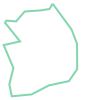

In [14]:
korea_border = countries[countries.name == "Korea"].geometry
korea_border.boundary.squeeze() # 왜 안되지...?

<br>

### 1.2.4 Geometry 데이터의 속성

- 지리정보의 속성 (아래의 속성값은 Point 데이터에서는 모두 0이다.)
  - `area` : 넓이
  - `boundary` : 테두리
  - `centroid` : 중앙지점  
  
  
- 두 Geometry 간의 거리를 계산해주는 함수 또한 유용하게 사용된다.
  - `distance` : 두 점사이의 거리  
  
  
- 넓이, 거린는 우리가 흔히 사용하는 제곱미터, 마일, 킬로미터 등의 단위를 사용하는 것이 아니다.
- 그래서 같은 객체 안에서의 비교만 가능하다.

<br>

## 1.3 GeoPandas의 지리 데이터 간의 관계 연산

- 관계를 연산한다  
$\rightarrow$ 두 데이터가 교차하는 지, 하나가 다른 하나의 내부에 있는 지 등  
  
  
- 좌표 데이터를 Shapely의 Geometry 자료형으로 만들면, 불러온 데이터셋을 이용해 아래와 같은 관계를 알 수 있다.
  - 어떤 도시가 어느 나라 안에 있는 지
  - 도시끼리의 거리는 얼마나 되는 지
  - 어떤 도시가 두 도시 사이에 존재하는 지

In [15]:
print(type(countries.geometry[0]))
print(type(korea_border.boundary.iloc[0]))
print(type(cities.geometry[0]))

<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.point.Point'>


In [16]:
from shapely.geometry import Point, Polygon, LineString

<br>

### 1.3.1 관계 연산 예제

1) 동북아시아의 주요 국가와 도시를 각각 선과 점으로 나타내고, 도시들을 이어줌

In [17]:
northern_asia = countries.loc[[30, 82, 87]]
northern_asia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
30,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,0.595617
82,1.270787e+08,Asia,Japan,JPN,4329000.0,(POLYGON ((134.6384281760039 34.14923371025642...,3.406551
87,4.850897e+07,Asia,Korea,KOR,1335000.0,"POLYGON ((128.3497164246766 38.61224294692785,...",2.752068


In [18]:
korea = countries.loc[countries['name'] == 'Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()

In [19]:
seoul = Point(126.99778, 37.56829)  # 경도, 위도
beijing = Point(116.363625, 39.913818)
tokyo = Point(139.839478, 35.652832)
hongkong = Point(114.149139, 22.286394)

In [20]:
line = LineString([hongkong, beijing, seoul, tokyo])

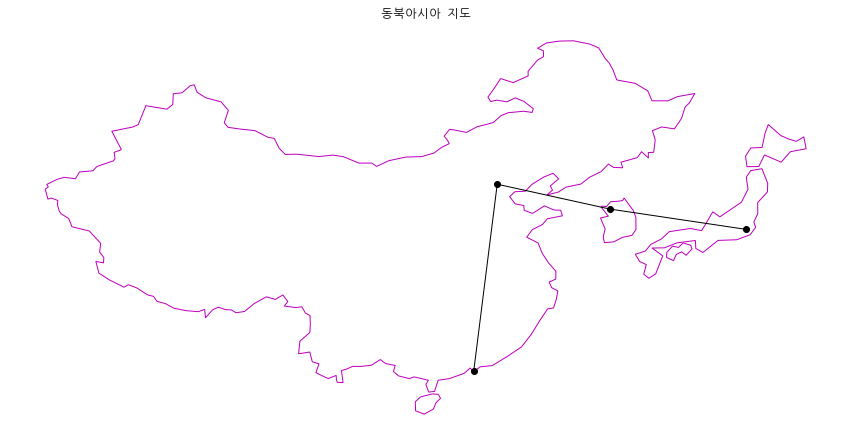

In [21]:
base = northern_asia.plot(figsize=(15, 15), color='w', edgecolor='m')
ax = gpd.GeoSeries([seoul, hongkong, beijing, tokyo, line]).plot(ax=base,
                                                                 color='k',
                                                                 edgecolor='k',
                                                                 lw=1)
ax.set_title('동북아시아 지도')
ax.set_axis_off()

**기본적인 관계 연산 함수들**

- 관계연산의 출력값은 부울리언 값이다.  
  
  
- `within` : 지리적으로 포함되는 지 여부
- `contains` : 지리적으로 포함하고 있는 지 여부
- `intersects` : 지리적으로 교차하는 지 여부, 두 지리가 경계선만 닿아있어도 True를 반환
- `crosses` : 지리적으로 교차하는 지 여부, `intersects`와의 차이점은 `crosses`는 내부를 지나가야만 True를 반환

In [22]:
# 서울은 한국 안에 있다.
seoul.within(korea)

True

In [23]:
# 한국은 서울을 포함하고 있다.
korea.contains(seoul)

True

In [24]:
# 중국과 한국의 국경은 맞닿아 있지 않다.
china.intersects(korea)

False

In [25]:
# 홍콩, 베이징, 도쿄, 서울을 잇는 선은 한국을 지나간다.
line.crosses(korea)

True

위와 같은 간단한 관계연산을 이용하면 데이터 검색 또한 가능하다.

In [26]:
countries[countries.crosses(line)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
30,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,0.595617
82,1.270787e+08,Asia,Japan,JPN,4329000.0,(POLYGON ((134.6384281760039 34.14923371025642...,3.406551
87,4.850897e+07,Asia,Korea,KOR,1335000.0,"POLYGON ((128.3497164246766 38.61224294692785,...",2.752068
129,2.266534e+07,Asia,Dem. Rep. Korea,PRK,40000.0,"POLYGON ((130.6400159038524 42.39500946712528,...",0.176481


<br>

### 1.3.2 속성을 이용한 연산

In [27]:
# 서울에서 베이징까지의 거리
seoul.distance(beijing)

10.889754550163614

In [28]:
# 한국으로부터 서울과 베이징 간의 거리 보다 가까운 데이터를 찾는다.
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
30,1.338613e+09,Asia,China,CHN,7973000.0,(POLYGON ((110.3391878601516 18.67839508714761...,0.595617
82,1.270787e+08,Asia,Japan,JPN,4329000.0,(POLYGON ((134.6384281760039 34.14923371025642...,3.406551
87,4.850897e+07,Asia,Korea,KOR,1335000.0,"POLYGON ((128.3497164246766 38.61224294692785,...",2.752068
129,2.266534e+07,Asia,Dem. Rep. Korea,PRK,40000.0,"POLYGON ((130.6400159038524 42.39500946712528,...",0.176481
135,1.400412e+08,Europe,Russia,RUS,2266000.0,(POLYGON ((143.6480074403629 50.74760040954152...,1.618095


In [29]:
# 한국의 면적과 중국 면적의 비율
china.area / korea.area

95.89681432460839

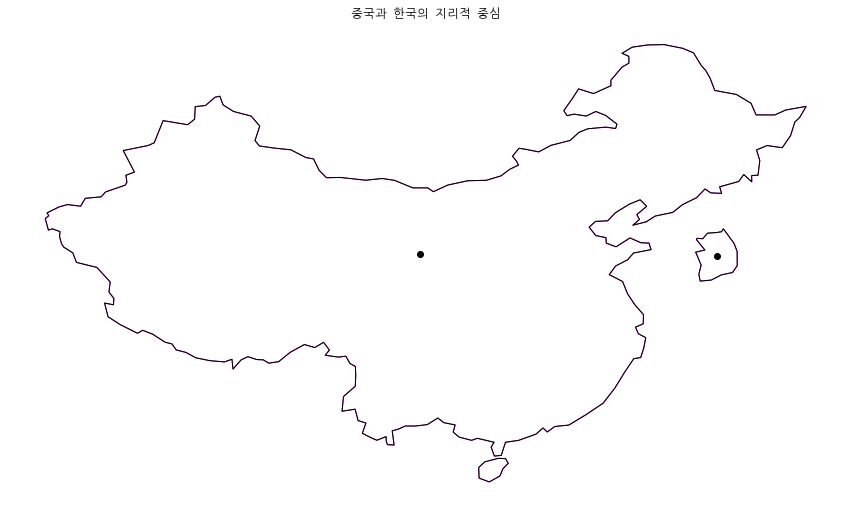

In [30]:
base = northern_asia[northern_asia.name != 'Japan'].plot(figsize=(15,15),
                                                         color='w',
                                                         edgecolor='m')
ax = gpd.GeoSeries([china.boundary, korea.boundary,
                    china.centroid, korea.centroid]).plot(ax=base,
                                                          color='k',
                                                          edgecolor='k',
                                                          lw=1)
ax.set_title('중국과 한국의 지리적 중심')
ax.set_axis_off()
plt.show()

<br>

## 1.4 지리 정보 조작

- 한국의 기초구역도 데이터를 활용하여 지리정보를 조작하는 예제
- [데이터 다운로드 링크](http://www.juso.go.kr/addrlink/addressBuildDevNew.do?menu=bsin)

### 1.4.1 데이터 파일 구조

<div stype="text-align: left; margin-left: 30px">
    <img src="images/GeoPandas/img001.jpg" width="200px"/>
</div>

- 각 지역마다 폴더가 나눠어져 있다.
- 그 중 **서울특별시** 데이터를 사용  
  
  
- 서울특별시 폴터 안의 3가지 종류의 파일
  - .dbf
  - .shx
  - .shp

### 1.4.2 shape file

- .shp, .shx, .dbf 3개의 파일을 합쳐서 shape file이라고 한다.
- shape file은 GIS에서 사용하는 벡터 형식의 데이터이다.  
  
  
1) .shp
- 점, 다각형 등의 지리 정보를 담고 있음
- 이때 지리정보의 타입은 혼용되지 않는다. (점과 다각형이 같은 파일에 저장될 수 없다.)  
  
  
2) .shx
- 지리정보의 인덱스 정보를 담고 있음  
  
  
3) .dbf
- 지리정보의 속성 정보를 담고 있음

- .shp 파일은 나머지 .dbf, .shx 파일이 없으면 불러올 수 없다.
- 그리고 "GRS80_UTMK.prj"는 데이터가 사용하는 좌표계 정보가 들어있다.
- 결과적으로 총 4가지 파일이 모두 한 곳에 있도록 한다.

In [31]:
seoul_file = "./data/GeoPandas/서울특별시/TL_KODIS_BAS_11.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail()

,BAS_MGT_SN,CTP_KOR_NM,SIG_CD,SIG_KOR_NM,BAS_ID,BAS_AR,NTFC_DE,MVMN_DE,MVMN_RESN,OPERT_DE,geometry
5660,1129000011,서울특별시,11290,성북구,02797,0.112,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((958717.2055169267 1956096.129629583,..."
5661,1129000028,서울특별시,11290,성북구,02709,0.150,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((956583.120655715 1957109.39934827, 9..."
5662,1129000046,서울특별시,11290,성북구,02851,0.052,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((957702.9099090951 1954159.860729071,..."
5663,1129000047,서울특별시,11290,성북구,02822,1.087,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((954675.9156118908 1956603.959798415,..."
5664,1129000068,서울특별시,11290,성북구,02838,0.126,20121221,20121221,국가기초구역 최초생성,20121221000000,"POLYGON ((955414.3235739921 1955463.202727248,..."


각 열의 의미

- BAS_MGT_SN : 기초구역 관리번호
- CTP_KOR_NM : 시도명
- SIG_CD : 시군구코드
- SIG_KOR_NM : 시군구명
- BAS_ID : 기초구역번호 본번
- BAS_AR : 기초구역 면적(km$^2$)
- NTFC_DE : 고시일자
- MVMN_DE : 이동일자
- MVMN_RESN : 이동사유
- OPERT_DE : 작업일시

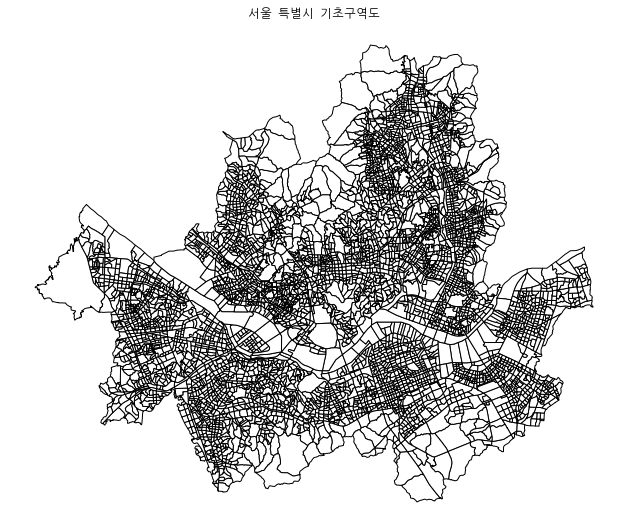

In [34]:
ax = seoul.plot(figsize=(11,11), color='w', edgecolor='k')
ax.set_title('서울 특별시 기초구역도')
ax.set_axis_off()
plt.show()

<br>

### 1.4.3 지리정보 변환 기능 함수

1) `convex_hull`

- Polygon 데이터의 convex hull을 그린다.

2) `envelope`

- Polygon 데이터를 감싸는 가장 작은 사각형을 그린다.

3) `simplify(tolerance, preserve_topology=True)`

- Polygon 데이터에 대해 컨투어 추정을 한다.

4) `buffer(distance, resolution=16)`

- Point, LineString 데이터에 실행하면 주어진 거리 내의 모든 점을 이어 Polygon 데이터를 만듬
- Polygon에 적용하면 주어진 거리만큼 확장

5) `unary_union`

- 여러 개의 geometry 데이터의 합집합을 구한다.
- Polygon 내에 빈 곳이 있는 경우, `unary_union`가 실행되지 않는다.
- 이 때는 `buffer()` 명령으로 Polygon의 빈 곳을 채워준 후 사용한다.

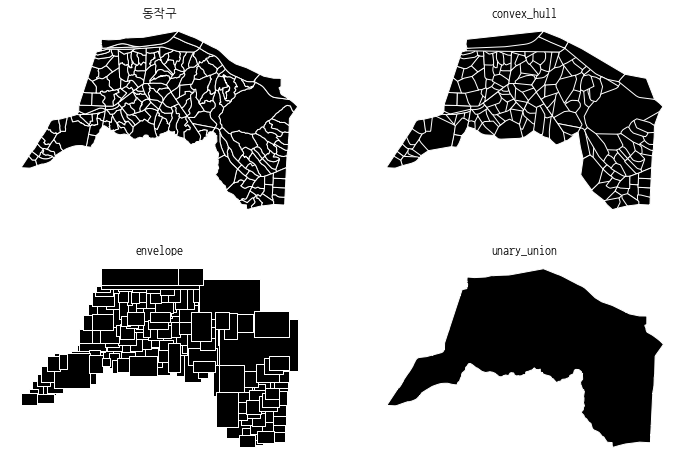

In [49]:
# 동작구의 기초 구역도를 위 함수들을 이용해 변환

sample = seoul[seoul.SIG_KOR_NM == '동작구']

plt.figure(figsize=(12,8))
ax = plt.subplot(2,2,1)
sample.plot(color='k', edgecolor='w', ax=ax)
ax.set_title('동작구')
ax.set_axis_off()

ax = plt.subplot(2,2,2)
sample.convex_hull.plot(color='k', edgecolor='w', ax=ax)
ax.set_title('convex_hull')
ax.set_axis_off()

ax = plt.subplot(2,2,3)
sample.envelope.plot(color='k', edgecolor='w', ax=ax)
ax.set_title('envelope')
ax.set_axis_off()

ax = plt.subplot(2,2,4)
gpd.GeoSeries([sample.geometry.buffer(0.01).unary_union]).plot(ax=ax,
                                                              color='k',
                                                              edgecolor='w')
ax.set_title('unary_union')
ax.set_axis_off()

plt.show()

### 1.4.4 그룹핑 기능

- GeoDataFrame 또한 Pandas DataFrame의 `groupby` 명령과 같은 그룹핑 기능을 제공한다.

1) `Dissolve`

- GeoDataFrame 내의 geometry를 그룹별로 `unary_union`를 이용해 geometry 데이터를 합친다.
- 다른 컬럼에 정보가 있는 경우, `aggfunc` 인수를 설정하여 처리 방법을 정의할 수 있다.

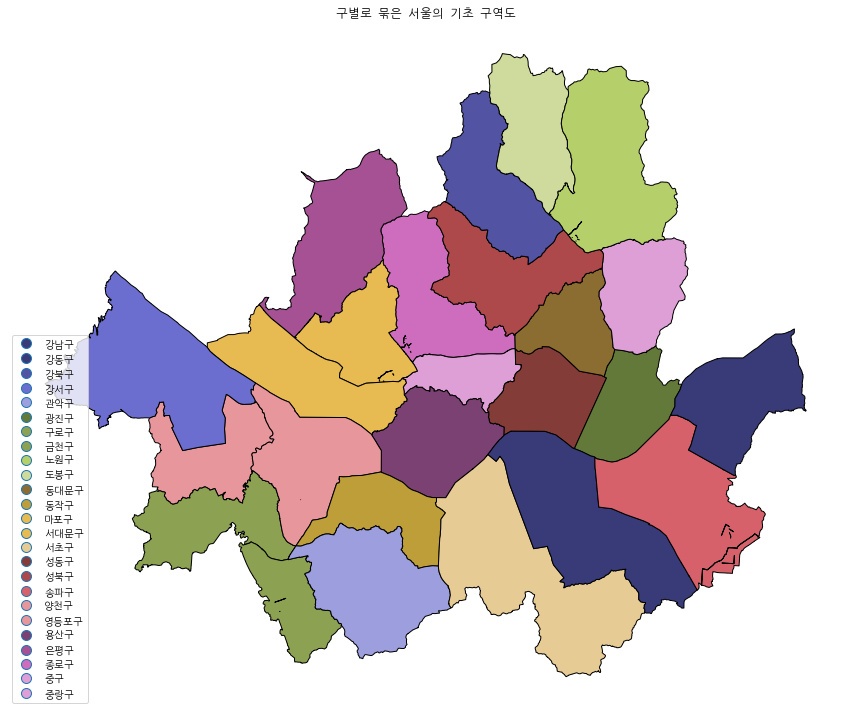

In [51]:
seoul.geometry = seoul.buffer(0.001)
seoul = seoul.dissolve(by='SIG_CD')
ax = seoul.plot(figsize=(15,15),
                column='SIG_KOR_NM',
                categorical=True,
                cmap='tab20b',
                edgecolor='k',
                legend=True,
                legend_kwds={'loc': 3})
ax.set_title('구별로 묶은 서울의 기초 구역도')
ax.set_axis_off()
plt.show()

<br>

## 1.5 GeoPandas의 유용한 기능

### 1.5.1 좌표계 (Coordinate reference systems)